Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for data manipulation as visulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Import Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# for evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Imported Data

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine learning project/SUV Car Purchesing prediction/suv_data.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Data Preprocessing and Visualizatin

In [5]:
dataset.shape

(400, 5)

In [6]:
# drop user Id columns
dataset=dataset.drop(['User ID'], axis=1)


In [7]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
# Null value count
dataset.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
dataset.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

replace

 Male-1


Female-0

In [10]:
dataset['Gender']=dataset.Gender.map({'Male':1, 'Female':0})

In [11]:
dataset["Gender"].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [12]:
dataset.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [13]:
dataset.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [14]:
# corellation matrics
dataset.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

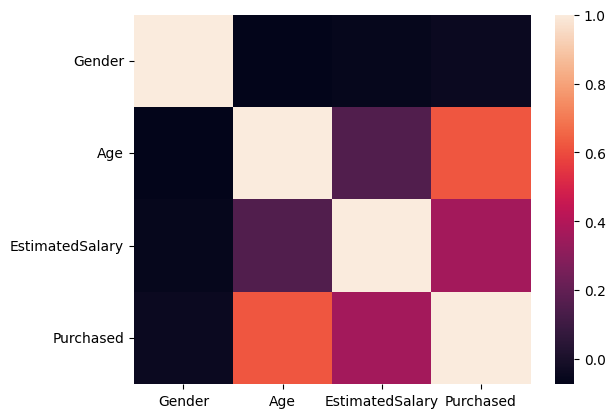

In [15]:
# lets visualize corellation with the heatmap
sns.heatmap(dataset.corr())

Distribution Features
\

Age

Text(0, 0.5, 'Count')

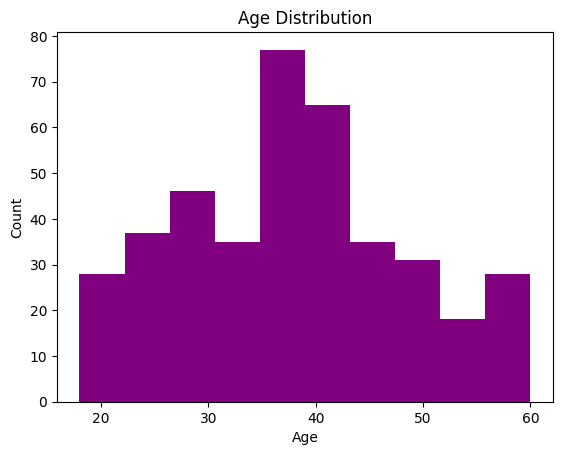

In [16]:
plt.figure
plt.hist(dataset.Age , color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Gender

Text(0, 0.5, 'Count')

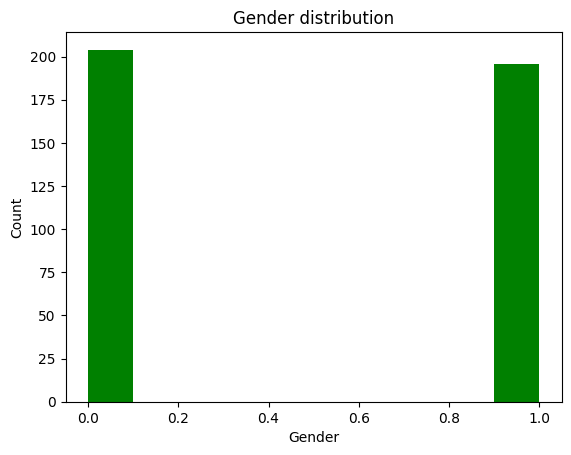

In [17]:
plt.figure
plt.hist(dataset.Gender, color="green")
plt.title("Gender distribution")
plt.xlabel('Gender')
plt.ylabel('Count')

Estimated salary

Text(0, 0.5, 'counts')

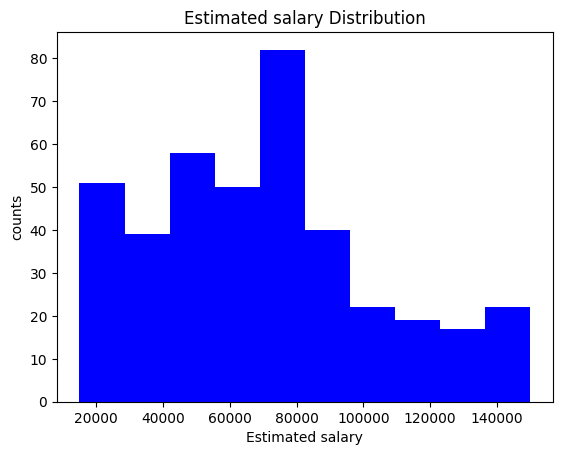

In [18]:
plt.figure
plt.hist(dataset.EstimatedSalary, color="blue")
plt.title("Estimated salary Distribution")
plt.xlabel('Estimated salary')
plt.ylabel('counts')

Splitting Dataset into X and Y

In [19]:
x=dataset.drop(['Purchased'], axis=1)
y=dataset['Purchased']


In [20]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

Splitting the dataset into  train and test dataset

In [22]:
x_train , x_test, y_train ,y_test= train_test_split(x,y , stratify=y, test_size=0.2, random_state=42 )

In [23]:
print(x_train.shape, x_test.shape)

(320, 3) (80, 3)


Feature scaling

In [24]:
sc =StandardScaler()

In [25]:
x_train=pd.DataFrame(sc.fit_transform(x_train))
x_test=pd.DataFrame(sc.fit_transform(x_test))

In [26]:
x_train.head()

,0,1,2
0,1.084837,-1.234462,-0.367992
1,-0.921798,-0.577646,-1.058314
2,-0.921798,0.079170,0.264803
3,-0.921798,1.955786,-1.374712
4,-0.921798,0.360662,-0.310465


In [27]:
x_test.head()

,0,1,2
0,-1.257237,0.886207,1.742297
1,0.795395,-1.448709,-1.646974
2,0.795395,-0.493516,-1.484028
3,-1.257237,-0.175119,1.514173
4,-1.257237,-2.085504,0.536499


Training Model

Logistic Regression

In [28]:
LR=LogisticRegression(random_state=42)

In [29]:
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [30]:
yLR=LR.predict(x_test)
yLR

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [31]:
# classifiction Report
print(classification_report(y_test, yLR))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.83      0.52      0.64        29

    accuracy                           0.79        80
   macro avg       0.80      0.73      0.74        80
weighted avg       0.80      0.79      0.77        80



####Precision = TruePositives / (TruePositives + FalsePositives)
####Recall = TruePositives / (TruePositives + FalseNegatives)
####F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [32]:
# creating evaluation model
score={}

In [33]:
def eval_model(model, y_true, y_preds):
  prec=precision_score(y_true, y_preds)
  recall=recall_score(y_true, y_preds)
  f1= f1_score(y_true, y_preds)
  acc=accuracy_score(y_true, y_preds)
  score[model] = [prec,recall,f1,acc]

  print(f"The precision score of model {model} is :  {(prec*100):2f} ")
  print(f"The Recall score of {model} model is :  {(recall*100):.2f}")
  print(f"The f1 score of {model} model is :   {(f1*100):.2f}")
  print(f"The Accuracy of {model} model is :   {(acc*100):.2f}")

In [34]:
# evaluate Logistic regression
eval_model("Logistic Regression",y_test, yLR)

The precision score of model Logistic Regression is :  83.333333 
The Recall score of Logistic Regression model is :  51.72
The f1 score of Logistic Regression model is :   63.83
The Accuracy of Logistic Regression model is :   78.75


In [35]:
pd.DataFrame(score)

,Logistic Regression
0,0.833333
1,0.517241
2,0.638298
3,0.787500


In [36]:
# Now create the confusion metrix

# y_axix ====Actual value
# X axis ====Predicted value
print(confusion_matrix(y_test, yLR))

[[48  3]
 [14 15]]


##2. kNearest Neighbor(KNN) Algorithm

In [37]:
KN = KNeighborsClassifier()

In [38]:
KN.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
KN.score(x_test, y_test)

0.9125

In [40]:
yKN =KN. predict(x_test)
yKN

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [41]:
# classification Report
print(classification_report(yKN, y_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.93      0.84      0.89        32

    accuracy                           0.91        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.91      0.91      0.91        80



In [42]:
eval_model('KNN', y_test, yKN)

The precision score of model KNN is :  84.375000 
The Recall score of KNN model is :  93.10
The f1 score of KNN model is :   88.52
The Accuracy of KNN model is :   91.25


In [43]:
# confusion matrix
confusion_matrix(y_test, yKN)


array([[46,  5],
       [ 2, 27]])

##Support vector Machine



In [44]:
SV = SVC(random_state=42)
SV.fit(x_train, y_train)

SVC(random_state=42)

In [45]:
SV.score(x_test, y_test)

0.8875

In [46]:
# predict output for X_test data
ySV= SV.predict(x_test)
ySV

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [47]:
# classification Report
print(classification_report(y_test, ySV))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        51
           1       0.83      0.86      0.85        29

    accuracy                           0.89        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



In [48]:
eval_model("SVM", y_test, ySV)

The precision score of model SVM is :  83.333333 
The Recall score of SVM model is :  86.21
The f1 score of SVM model is :   84.75
The Accuracy of SVM model is :   88.75


In [49]:
# confusion matrix
confusion_matrix(y_test, ySV)

array([[46,  5],
       [ 4, 25]])

##Naive Bayes Classifier Algorithm

In [50]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [51]:
NB.score(x_test, y_test)

0.825

In [52]:
# prediction of output for x_test data
yNB = NB.predict(x_test)
yNB

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [53]:
# classification Report
print(classification_report(y_test, yNB))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        51
           1       0.83      0.66      0.73        29

    accuracy                           0.82        80
   macro avg       0.83      0.79      0.80        80
weighted avg       0.83      0.82      0.82        80



In [54]:
eval_model("Naive Bayes",y_test, yNB)

The precision score of model Naive Bayes is :  82.608696 
The Recall score of Naive Bayes model is :  65.52
The f1 score of Naive Bayes model is :   73.08
The Accuracy of Naive Bayes model is :   82.50


In [55]:
# confusion matrix
confusion_matrix(y_test, yNB)

array([[47,  4],
       [10, 19]])

##Decision Tree

In [56]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
DT.score(x_test, y_test)

0.9

In [58]:
# prediction of output for test data
yDT = DT.predict(x_test)
yDT

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [59]:
# classification Report
print(classification_report(y_test , yDT))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        51
           1       0.89      0.83      0.86        29

    accuracy                           0.90        80
   macro avg       0.90      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80



In [60]:
eval_model("Decision Tree", y_test, yDT)

The precision score of model Decision Tree is :  88.888889 
The Recall score of Decision Tree model is :  82.76
The f1 score of Decision Tree model is :   85.71
The Accuracy of Decision Tree model is :   90.00


In [61]:
# confussion matrix
confusion_matrix(y_test, yDT)

array([[48,  3],
       [ 5, 24]])

##Random Forest Classifier

In [62]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [63]:
RF.score(x_test, y_test)

0.9125

In [64]:
# prediction of outputb for x_test data
yRF=RF.predict(x_test)
yRF

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [65]:
# classificationm Report
print(classification_report(y_test, yRF))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.89      0.86      0.88        29

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



In [66]:
eval_model("Random forest",y_test, yRF)

The precision score of model Random forest is :  89.285714 
The Recall score of Random forest model is :  86.21
The f1 score of Random forest model is :   87.72
The Accuracy of Random forest model is :   91.25


In [67]:
# confussion matrix
confusion_matrix(y_test, yRF)

array([[48,  3],
       [ 4, 25]])